In [ ]:
 # Importing the 'drive' module from the 'google.colab' package
from google.colab import drive

# Mounting Google Drive to the '/content/drive' directory
drive.mount('/content/drive')

# Setting the root directory path for the dataset
root = '/content/drive/MyDrive/Colab Notebooks/FindIT/Dataset/hotel/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

## 1. Dataset

### 1.1 Input Table

In [ ]:
# Reading the CSV file 'test_set_features.csv' and storing the data in the 'test_feature' DataFrame
test_feature = pd.read_csv(root + 'test_feature.csv')

# Reading the CSV file 'training_set_features.csv' and storing the data in the 'train_feature' DataFrame
train_feature = pd.read_csv(root + 'train_features.csv')


In [ ]:
# Reading the CSV file 'training_set_labels.csv' and storing the data in the 'train_label' DataFrame
train_label = pd.read_csv(root+'train_label.csv')

In [ ]:
# Merging the 'train_label' and 'train_feature' DataFrames based on the 'respondent_id' column
# and storing the merged result in the 'df' DataFrame
df = pd.concat([train_feature, train_label], axis=1)


In [ ]:
df.head()

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night"
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night"
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night"
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night"
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night"


### 1.2 Table Setting

In [ ]:
# Setting the maximum number of columns to display as None (unlimited)
pd.set_option('display.max_columns', None)

# Setting the maximum number of rows to display as None (unlimited)
pd.set_option('display.max_rows', None)


In [ ]:
# Printing the number of rows and columns in the 'test_feature' DataFrame
print('test_set_feature:', test_feature.shape[0], "rows and", test_feature.shape[1], 'columns')

# Printing a separator line
print('---------------------------')

print('test_set_feature:', train_feature.shape[0], "rows and", train_feature.shape[1], 'columns')

# Printing a separator line
print('---------------------------')

print('test_set_feature:', train_label.shape[0], "rows and", train_label.shape[1], 'columns')

# Printing a separator line
print('---------------------------')

# Printing the number of rows and columns in the 'df' DataFrame
print('Dataset:', df.shape[0], "rows and", df.shape[1], 'columns')


test_set_feature: 767 rows and 4 columns
---------------------------
test_set_feature: 3066 rows and 3 columns
---------------------------
test_set_feature: 3066 rows and 1 columns
---------------------------
Dataset: 3066 rows and 4 columns


## 2. Data Understanding

### 2.1 Data Checking

2.1.2 Showing Data Values

Test Feature Data Values

## 3. Preprocessing Data

In [ ]:
# Displaying the data types of each column in the 'df' DataFrame
df.dtypes

facilities    object
rating        object
location      object
Price         object
dtype: object

In [ ]:
#displaying the first few rows of the dataframe
df.head()

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night"
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night"
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night"
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night"
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night"


In [ ]:
# Calculating the total number of missing values for each column and sorting in descending order
total_missing = df.isnull().sum().sort_values(ascending=False)

# Calculating the percentage of missing values for each column
percent_1 = df.isnull().sum() / df.isnull().count() * 100

# Rounding the percentage values to one decimal place and sorting in descending order
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creating a DataFrame 'missing_data' by combining the total missing values and percentage values
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])

# Resetting the index of 'missing_data' DataFrame and renaming the column
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})

# Showing the DataFrame 'missing_data'
missing_data

,Column,Total Missing,%
0,rating,637,20.8
1,facilities,301,9.8
2,location,0,0.0
3,Price,0,0.0


In [ ]:
#Creates a copy of DataFrame 'df' as the DataFrame 'df1'
df1 = df.copy()

In [ ]:

price = "13,500avg/night"

# Memisahkan angka dan teks
split_price = price.split('avg/night')
amount = split_price[0].replace(',', '')  # Menghapus tanda koma jika ada

# Memeriksa apakah angka valid
if amount.isdigit():
    amount = int(amount)
else:
    # Handle jika angka tidak valid
    amount = None

print("Amount:", amount)  # Output: 13500

# Contoh dengan kolom DataFrame menggunakan pandas
import pandas as pd

df1['amount'] = df1['Price'].str.split('avg/night').str[0].str.replace(',', '')
df1['amount'] = pd.to_numeric(df1['amount'], errors='coerce')

Amount: 13500


In [ ]:
df1['ratings'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)

In [ ]:
df1.head()

,facilities,rating,location,Price,amount,ratings
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night",13500,7.8
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night",13000,5.6
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night",19000,7.2
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night",6000,7.3
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night",20000,7.2


In [ ]:
df2 = df1.copy()

In [ ]:
# Contoh dengan string tunggal
rating_info = "7.8 Very GoodFrom 10 reviews"

# Memisahkan rating, deskripsiRating, dan jumlahReviews
split_rating = rating_info.split(' ')
rating = split_rating[0]
deskripsi_rating = ' '.join(split_rating[1:-2])
jumlah_reviews = split_rating[-2]

print("Rating:", rating)  # Output: 7.8
print("Deskripsi Rating:", deskripsi_rating)  # Output: Very Good
print("Jumlah Reviews:", jumlah_reviews)  # Output: 10

# Contoh dengan kolom DataFrame menggunakan pandas
import pandas as pd

df2['deskripsiRating'] = df1['rating'].str.split(' ').str[1:-2].str.join(' ')
df2['jumlahReviews'] = df1['rating'].str.split(' ').str[-2]

Rating: 7.8
Deskripsi Rating: Very GoodFrom
Jumlah Reviews: 10


In [ ]:
# Contoh dengan string tunggal
deskripsi = "Very GoodFrom"

# Menghapus kata "From"
deskripsi_cleaned = deskripsi.replace("From", "").strip()

print("Deskripsi cleaned:", deskripsi_cleaned)  # Output: Very Good


df2['deskripsiRating'] = df2['deskripsiRating'].str.replace("From", "").str.strip()

Deskripsi cleaned: Very Good


In [ ]:
df2.head()

,facilities,rating,location,Price,amount,ratings,deskripsiRating,jumlahReviews
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night",13500,7.8,Very Good,10
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night",13000,5.6,Good,4
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night",19000,7.2,Very Good,38
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night",6000,7.3,Very Good,6
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night",20000,7.2,Very Good,30


In [ ]:
df3 =df2.copy()

In [ ]:
df2.dtypes

facilities          object
rating              object
location            object
Price               object
amount               int64
ratings            float64
deskripsiRating     object
jumlahReviews       object
dtype: object

In [ ]:
# Contoh dengan kolom DataFrame menggunakan pandas
df3['Fasilitas_Restaurant'] = df['facilities'].str.contains('restaurant', case=False)
df3['Fasilitas_BAR'] = df['facilities'].str.contains('BAR', case=False)
df3['Fasilitas_Internet'] = df['facilities'].str.contains('internet', case=False)
df3['Fasilitas_GYM'] = df['facilities'].str.contains('GYM', case=False)
df3['Fasilitas_SwimmingPool'] = df['facilities'].str.contains(r'swimmingpool|swimming|pool', case=False)




In [ ]:
df3.head(10)

,facilities,rating,location,Price,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night",13500,7.8,Very Good,10,True,True,False,False,True
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night",13000,5.6,Good,4,True,False,False,True,False
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night",19000,7.2,Very Good,38,True,True,False,True,True
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night",6000,7.3,Very Good,6,True,True,False,False,False
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night",20000,7.2,Very Good,30,True,False,True,False,False
5,internet,5.4 GoodFrom 13 reviews,Uberlandia,"4,000avg/night",4000,5.4,Good,13,False,False,True,False,False
6,Bar,7.9 Very GoodFrom 3 reviews,Hallerson,"15,000avg/night",15000,7.9,Very Good,3,False,True,False,False,False
7,barRestaurant,7.3 Very GoodFrom 7 reviews,Willsmian,"13,500avg/night",13500,7.3,Very Good,7,True,True,False,False,False
8,intrnetbarRestaurant,NaN,Andeman,"7,475avg/night",7475,NaN,NaN,NaN,True,True,False,False,False
9,intrnetbarrestaurant,7.7 Very GoodFrom 8 reviews,Stokol,"20,000avg/night",20000,7.7,Very Good,8,True,True,False,False,False


In [ ]:
df3['Fasilitas_Restaurant'].value_counts()

True     2327
False     438
Name: Fasilitas_Restaurant, dtype: int64

In [ ]:
df3.isnull().sum()

facilities                301
rating                    637
location                    0
Price                       0
amount                      0
ratings                   660
deskripsiRating           637
jumlahReviews             637
Fasilitas_Restaurant      301
Fasilitas_BAR             301
Fasilitas_Internet        301
Fasilitas_GYM             301
Fasilitas_SwimmingPool    301
dtype: int64

In [ ]:
# Calculating the total number of missing values for each column and sorting in descending order
total_missing = df3.isnull().sum().sort_values(ascending=False)

# Calculating the percentage of missing values for each column
percent_1 = df3.isnull().sum() / df3.isnull().count() * 100

# Rounding the percentage values to one decimal place and sorting in descending order
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creating a DataFrame 'missing_data' by combining the total missing values and percentage values
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])

# Resetting the index of 'missing_data' DataFrame and renaming the column
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})

# Showing the DataFrame 'missing_data'
missing_data

,Column,Total Missing,%
0,ratings,660,21.5
1,rating,637,20.8
2,deskripsiRating,637,20.8
3,jumlahReviews,637,20.8
4,facilities,301,9.8
5,Fasilitas_Restaurant,301,9.8
6,Fasilitas_BAR,301,9.8
7,Fasilitas_Internet,301,9.8
8,Fasilitas_GYM,301,9.8
9,Fasilitas_SwimmingPool,301,9.8


In [ ]:
df3.drop(['facilities', 'Price'], axis=1, inplace=True)

In [ ]:
df3['deskripsiRating'].value_counts()

Very Good    1304
Excellent     780
Good          260
Fair           62
               23
Name: deskripsiRating, dtype: int64

In [ ]:
df3.to_csv("df.csv", index=False)

### 3.1 Handling Missing value

In [ ]:
df3.drop('rating', axis=1, inplace=True)

In [ ]:
df3.head(2)

,location,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool
0,Stokol,13500,7.8,Very Good,10,True,True,False,False,True
1,Machlessvile,13000,5.6,Good,4,True,False,False,True,False


In [ ]:
df3['Fasilitas_Restaurant'].fillna(df3['Fasilitas_Restaurant'].mode()[0], inplace=True)
df3['Fasilitas_BAR'].fillna(df3['Fasilitas_BAR'].mode()[0], inplace=True)
df3['Fasilitas_Internet'].fillna(df3['Fasilitas_Internet'].mode()[0], inplace=True)
df3['Fasilitas_GYM'].fillna(df3['Fasilitas_GYM'].mode()[0], inplace=True)
df3['Fasilitas_SwimmingPool'].fillna(df3['Fasilitas_SwimmingPool'].mode()[0], inplace=True)

In [ ]:
df3['deskripsiRating'].fillna(df3['deskripsiRating'].mode()[0], inplace=True)

Data numerical

<Axes: xlabel='ratings', ylabel='Count'>

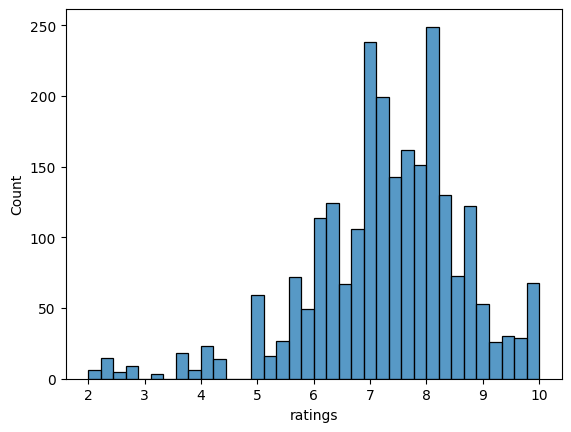

In [ ]:
sns.histplot(data = df3['ratings'])

In [ ]:
df3.dtypes

location                   object
amount                      int64
ratings                   float64
deskripsiRating            object
jumlahReviews              object
Fasilitas_Restaurant         bool
Fasilitas_BAR                bool
Fasilitas_Internet           bool
Fasilitas_GYM                bool
Fasilitas_SwimmingPool       bool
dtype: object

In [ ]:
df3['jumlahReviews'] = df3['jumlahReviews'].astype(float)

In [ ]:
df4 = df3.copy()

In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek SimpleImputer dengan strategi 'median'
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Mengisi missing value pada kolom numerik
df4['jumlahReviews'] = imputer.fit_transform(df4[['jumlahReviews']])

In [ ]:
# Mengisi missing value pada kolom numerik
df4['ratings'] = imputer.fit_transform(df4[['ratings']])

In [ ]:
#df4['jumlahReviews'] = df3['jumlahReviews'].fillna(df3['jumlahReviews'].mean())
#df4['ratings'] = df3['ratings'].fillna(df3['ratings'].mean())

<Axes: xlabel='jumlahReviews', ylabel='Count'>

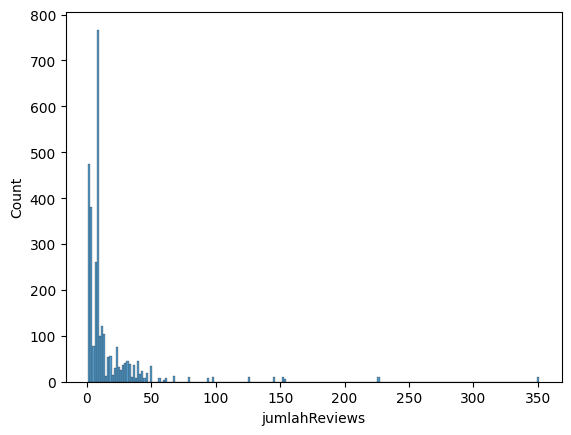

In [ ]:
sns.histplot(data = df4['jumlahReviews'])

<Axes: xlabel='ratings', ylabel='Count'>

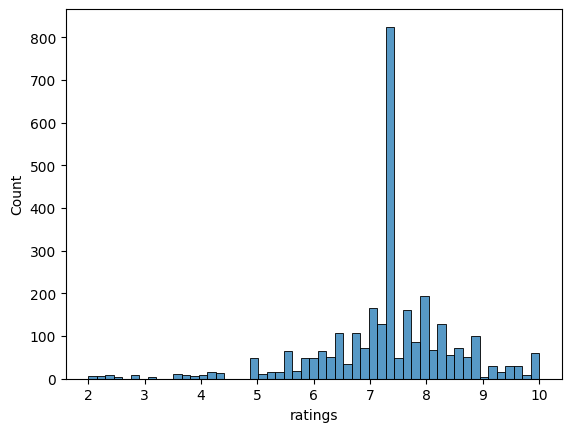

In [ ]:
sns.histplot(data = df4['ratings'])

In [ ]:
df4.isnull().sum()

location                  0
amount                    0
ratings                   0
deskripsiRating           0
jumlahReviews             0
Fasilitas_Restaurant      0
Fasilitas_BAR             0
Fasilitas_Internet        0
Fasilitas_GYM             0
Fasilitas_SwimmingPool    0
dtype: int64

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3066 non-null   object 
 1   amount                  3066 non-null   int64  
 2   ratings                 3066 non-null   float64
 3   deskripsiRating         3066 non-null   object 
 4   jumlahReviews           3066 non-null   float64
 5   Fasilitas_Restaurant    3066 non-null   bool   
 6   Fasilitas_BAR           3066 non-null   bool   
 7   Fasilitas_Internet      3066 non-null   bool   
 8   Fasilitas_GYM           3066 non-null   bool   
 9   Fasilitas_SwimmingPool  3066 non-null   bool   
dtypes: bool(5), float64(2), int64(1), object(2)
memory usage: 134.9+ KB


### encoding

In [ ]:
df4 = pd.get_dummies(df4, columns=['location'])

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df4['deskripsiRating']= label_encoder.fit_transform(df4['deskripsiRating'])

In [ ]:
df4['Fasilitas_Restaurant']= label_encoder.fit_transform(df4['Fasilitas_Restaurant'])

In [ ]:
df4['Fasilitas_Restaurant']= label_encoder.fit_transform(df4['Fasilitas_Restaurant'])
df4['Fasilitas_BAR']= label_encoder.fit_transform(df4['Fasilitas_BAR'])
df4['Fasilitas_Internet']= label_encoder.fit_transform(df4['Fasilitas_Internet'])
df4['Fasilitas_GYM']= label_encoder.fit_transform(df4['Fasilitas_GYM'])
df4['Fasilitas_SwimmingPool']= label_encoder.fit_transform(df4['Fasilitas_SwimmingPool'])

In [ ]:
df_new = df4.copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   amount                  3066 non-null   int64  
 1   ratings                 3066 non-null   float64
 2   deskripsiRating         3066 non-null   int64  
 3   jumlahReviews           3066 non-null   float64
 4   Fasilitas_Restaurant    3066 non-null   int64  
 5   Fasilitas_BAR           3066 non-null   int64  
 6   Fasilitas_Internet      3066 non-null   int64  
 7   Fasilitas_GYM           3066 non-null   int64  
 8   Fasilitas_SwimmingPool  3066 non-null   int64  
 9   location_Andeman        3066 non-null   uint8  
 10  location_Hallerson      3066 non-null   uint8  
 11  location_Machlessvile   3066 non-null   uint8  
 12  location_Stokol         3066 non-null   uint8  
 13  location_Uberlandia     3066 non-null   uint8  
 14  location_Ubisville      3066 non-null   

In [ ]:
df_new.shape

(3066, 17)

In [ ]:
df_new.head(2)

,amount,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool,location_Andeman,location_Hallerson,location_Machlessvile,location_Stokol,location_Uberlandia,location_Ubisville,location_Wanderland,location_Willsmian
0,13500,7.8,4,10.0,1,1,0,0,1,0,0,0,1,0,0,0,0
1,13000,5.6,3,4.0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = df_new.loc[:, df_new.columns != 'amount']
y = df_new['amount']

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 465 to 141
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ratings                 614 non-null    float64
 1   deskripsiRating         614 non-null    int64  
 2   jumlahReviews           614 non-null    float64
 3   Fasilitas_Restaurant    614 non-null    int64  
 4   Fasilitas_BAR           614 non-null    int64  
 5   Fasilitas_Internet      614 non-null    int64  
 6   Fasilitas_GYM           614 non-null    int64  
 7   Fasilitas_SwimmingPool  614 non-null    int64  
 8   location_Andeman        614 non-null    uint8  
 9   location_Hallerson      614 non-null    uint8  
 10  location_Machlessvile   614 non-null    uint8  
 11  location_Stokol         614 non-null    uint8  
 12  location_Uberlandia     614 non-null    uint8  
 13  location_Ubisville      614 non-null    uint8  
 14  location_Wanderland     614 non-null    

In [ ]:
from sklearn import linear_model, metrics

#### linear regression

In [ ]:
 # create linear regression object
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

####  lasso


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

# Melatih model
lasso.fit(X_train, y_train)



Lasso(alpha=0.1)

#### ridge

In [ ]:
from sklearn.linear_model import Ridge

# Membuat objek model regresi Ridge
ridge = Ridge(alpha=0.5)

# Melatih model
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [ ]:
#pickle.dump(ridge, open('/content/drive/MyDrive/Colab Notebooks/FindIT/Dataset/hotel/model/ridge1.pkl', 'wb'))

#### random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Membuat objek model Random Forest Regressor
rfg = RandomForestRegressor(n_estimators=100)

# Melatih model
rfg.fit(X_train, y_train)

RandomForestRegressor()


#### GradientBoostingRegressor





In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat objek model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300)

# Melatih model
gbr.fit(X_train, y_train)

# 

GradientBoostingRegressor(n_estimators=300)

#### Support Vector Reg

In [ ]:
from sklearn.svm import SVR

# Membuat objek model Support Vector Regressor
model = SVR(kernel='linear')

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
svr = model.predict(X_test)

In [ ]:
#pickle.dump(svr, open('/content/drive/MyDrive/Colab Notebooks/FindIT/Dataset/hotel/model/svr_model2.pkl', 'wb'))

In [ ]:
#pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/FindIT/Dataset/hotel/model/svr_model40.pkl', 'wb'))

In [ ]:
X_test.head(2)

,ratings,deskripsiRating,jumlahReviews,Fasilitas_Restaurant,Fasilitas_BAR,Fasilitas_Internet,Fasilitas_GYM,Fasilitas_SwimmingPool,location_Andeman,location_Hallerson,location_Machlessvile,location_Stokol,location_Uberlandia,location_Ubisville,location_Wanderland,location_Willsmian
465,7.4,4,8.0,1,1,1,0,0,0,0,0,0,0,0,1,0
2123,8.8,1,6.0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
import joblib
joblib.dump(svr, 'svr_model')

['svr_model']

## evaluation

In [ ]:
y_pred = reg.predict(X_test)
lasso = lasso.predict(X_test)
ridge = ridge.predict(X_test)
rfg = rfg.predict(X_test)
gbr = gbr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("--------------Linear Regression---------------")
mean_absolute_error(y_test, y_pred)





--------------Linear Regression---------------


9710.171725026175

In [ ]:
print("--------------lasso Regression---------------")
mean_absolute_error(y_test, lasso)

--------------lasso Regression---------------


9710.149133180556

In [ ]:
print("--------------ridge Regression---------------")
mean_absolute_error(y_test, ridge)

--------------ridge Regression---------------


9710.11362002017

In [ ]:
print("--------------rfg Regression---------------")
mean_absolute_error(y_test, rfg)

--------------rfg Regression---------------


3936.751365616737

In [ ]:
print("--------------gbr Regression---------------")
mean_absolute_error(y_test, gbr)

--------------gbr Regression---------------


6339.188384149402

In [ ]:
print("--------------svr Regression---------------")
mean_absolute_error(y_test, svr)

--------------svr Regression---------------


10217.667827394978